<a href="https://colab.research.google.com/github/NjokiMbugua/House-prices/blob/main/DSC9_Independent_Project_Week_7_Njoki_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors affecting house Prices Prediction.





# Defining the Question.

### a. Specifying the question

Working as a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months and later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b. Defining Metrics for success

Create various models and determine the most appropriate and accurate one that will be used in house price predictions.







### c. Understanding the context

Performing a background search to understand the data in order to be a ble to draw a concrete data analysis plan.

### d. Recording the experimental design

EDA
Bivariate analysis

Multiple Linear Regression

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression

### e. Data Relevance

Data will be cross-checked to ensure it is relevant to the topic of study and adequate enough to answer the research question.

# Importing the Libraries

In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data

In [35]:
# Loading the dataset
# Url=/content/Independent Project Week 7 - house_data.csv
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Checking the datasets

In [10]:
# Checking the shape of the dataset
house.shape

(21613, 20)

In [11]:
# checking the data types
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# Getting information about the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [13]:
# Summary statistics on the dataset
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning


In [14]:
# checking for missing values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# Checking for duplicates
house.duplicated().sum()

3

In [16]:
# Drop the duplicates
house.drop_duplicates(inplace=True)

In [17]:
house.head(0)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


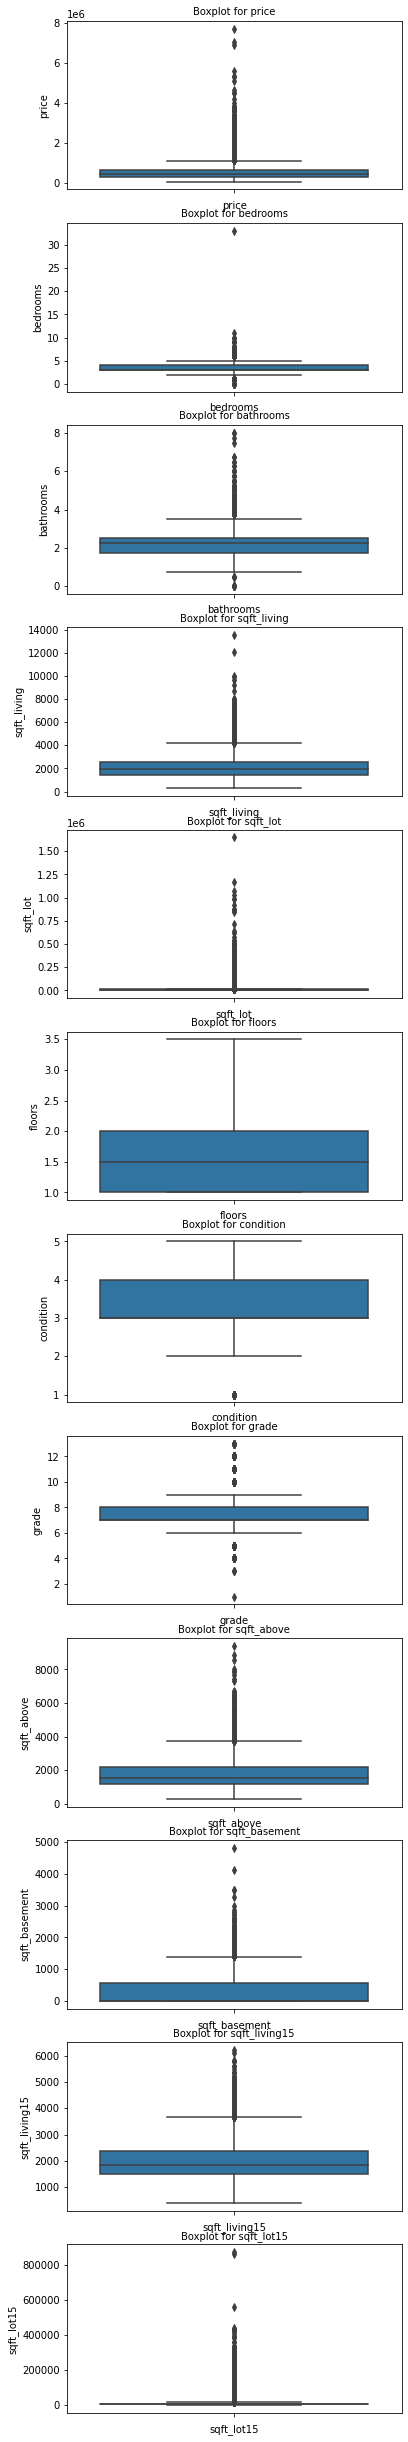

In [18]:
# Checking for outliers
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
             'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
        
    sns.boxplot(y=house[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=10)
    axs[i].set_xlabel(col_val, fontsize=10)

In [19]:

# Removing outliers
#house = house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
#house.shape()

In [20]:
# coverting the column for bathrooms to data type int since it was float
house['bathrooms']=np.int64(house['bathrooms'])
house['floors']=np.int64(house['floors'])

In [21]:
house.head(0)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
# Dropping irrelevant columns
house.drop(columns=['id','lat','long'],inplace=True)

In [23]:
house.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [24]:
# Exporting the cleaned dataset
house.to_csv('clean_housing_dataset.csv',index=False)

# Univariate analysis

In [25]:
# Frequency Tables
print('List of  popular bedroom options\n',house['bedrooms'].value_counts(),'\n\n')
print('List of popular bathroom options\n',house['bathrooms'].value_counts(),'\n\n')
print('List of the popular house size in sqft\n',house['sqft_living'].value_counts(),'\n\n')
print('List of the popular year of manufacture\n',house['yr_built'].value_counts(),'\n\n')

List of  popular bedroom options
 3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 


List of popular bathroom options
 2    10540
1     8354
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64 


List of the popular house size in sqft
 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64 


List of the popular year of manufacture
 2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64 






*   Majority of the houses were three bedroomed followed closely by four bedroomed houses.
*   Most houses had two bathrooms


*   The most common year which the houses was put up was 2014 followed closely by 2006
*   Majority of the houses had a living area of 1300 sqft.





Text(0, 0.5, 'Count')

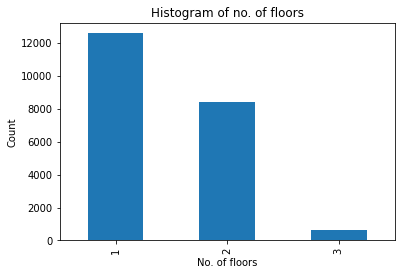

In [26]:
# Histogram showing number of floors
house['floors'].value_counts().plot(kind='bar')
plt.title('Histogram of no. of floors')
plt.xlabel('No. of floors')
plt.ylabel('Count')

Majority of the houses had three floors.

# Bivariate Analysis

Checking how various factors influence price

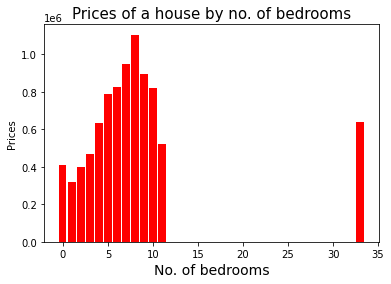

In [27]:
# Price and number of bedrooms
house =house.groupby(house['bedrooms'],as_index=False)['price'].mean()
plt.bar(house['bedrooms'],house['price'], color='red')
plt.title('Prices of a house by no. of bedrooms',fontsize=15)
plt.xlabel('No. of bedrooms',fontsize=14)
plt.ylabel('Prices')
plt.show()

Price of houses increased with increase in number of bedrooms.

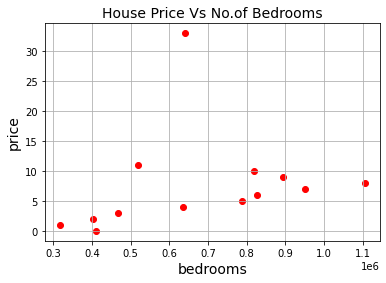

In [28]:
# Scatter plot showing relationship of price and number of bedrooms
plt.scatter(house['price'], house['bedrooms'], color='red')
plt.title('House Price Vs No.of Bedrooms', fontsize=14)
plt.xlabel('bedrooms', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()

A positive linear relationship was observed between price and number of bedrooms.

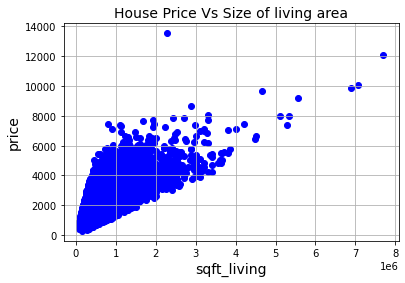

In [36]:
# Scatter plot showing relationship of price and size of the living area
plt.scatter(house['price'], house['sqft_living'], color='blue')
plt.title('House Price Vs Size of living area', fontsize=14)
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.grid(True)
plt.show()

An increase in size of the house resulted to an increase in price.

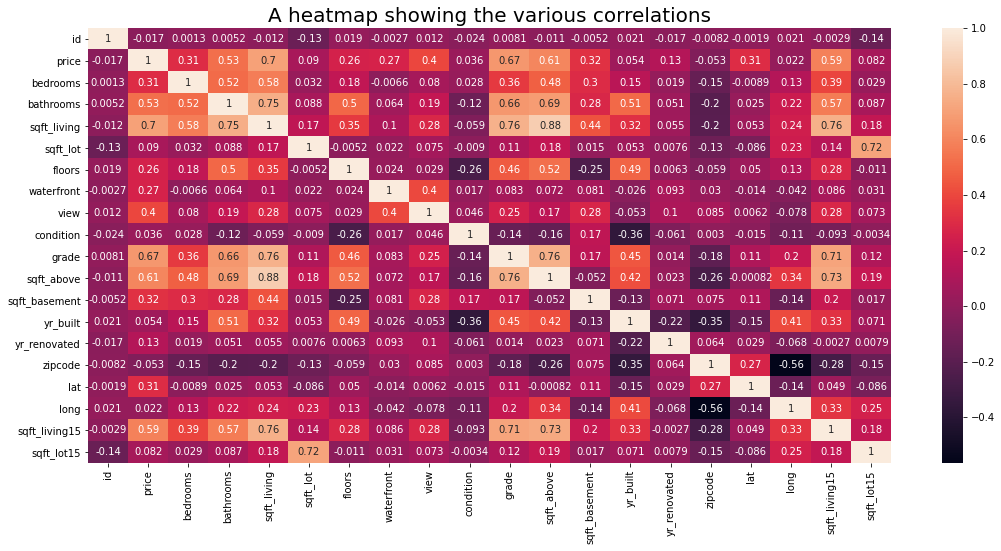

In [39]:
plt.figure(figsize=(18, 8))

house_corr = house.corr()
sns.heatmap(house_corr, 
            xticklabels = house_corr.columns.values,
            yticklabels = house_corr.columns.values,
            annot = True)
plt.title('A heatmap showing the various correlations',fontsize=20)
plt.show()

A strong positive correlation was observed between price and bathrooms, sqft_living, grade, sqft_above and sqft_lot15.

# Multiple Regression.

In [37]:
# Checking for multicollinearity
corr = house.corr()
corr


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


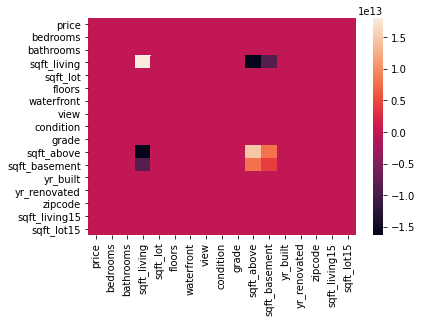

<Figure size 1800x1800 with 0 Axes>

In [20]:
#computing the VIF(which is the inverse of the correlation matrix)

VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sb.heatmap(VIF_df, annot = False)
plt.figure(figsize = (25, 25))
plt.show()

In [21]:
# Import the relevant libraries
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# Defining X and y labels
X = house.drop('price', axis=1)
y = house['price']

In [23]:
# Creating the linear model before training the data
linear = LinearRegression()
linear.fit(X, y)
mean_squared_error(y, linear.predict(X))

46460610391.346344

In [24]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [25]:
# Fitting multiple Linear Regression model to our Train set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Checking the perfomance of  the model using MSE
mean_squared_error(y_test, linear.predict(X_test))


50295663886.05742

In [27]:
# Predicting the test results
y_pred = regressor.predict(X_test)

In [111]:
#Determining the r2 Score
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.6608277206521629


In [28]:
# Comparing the actual output values for X_test with the predicted values
comparisondf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparisondf

,Actual,Predicted
6343,260000.0,2.776385e+05
9089,610000.0,7.298303e+05
8020,450000.0,5.679215e+05
6458,998160.0,1.060908e+06
9970,290000.0,5.056594e+05
...,...,...
21329,375000.0,3.732759e+05
15314,678000.0,7.158419e+05
799,1100000.0,1.381358e+06
19481,399950.0,4.674746e+05


The model had an accuracy of 66%. 

## Residual plot

In [29]:
# creating a residual plot for the model

residuals = y_pred-y_test
#residuals = np.subtract(admit_predict, admit_test)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-5090.738894135835

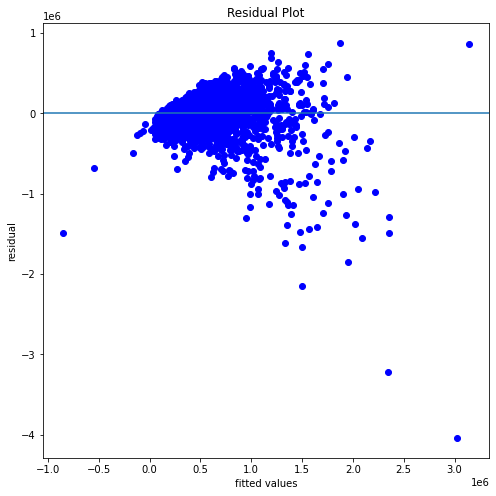

In [30]:
# Plotting the prediction errors
plt.figure(figsize = (8,8))
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline()
plt.show()

Most of the residuals are fairly centered around the mean signifying that the model is fairly good at predicting the house prices.

## Assessing heteroscedasticity using Bartlett’s test

In [31]:
import scipy as sp

# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

In [32]:
# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)
print(critical_value)

inf


In [33]:
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


# Quantile Regression

In [34]:
house.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [35]:
# First we import relevant libraries
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
# Splitting our data into training and test sets
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront','view',
     'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode',
        'sqft_living15', 'sqft_lot15']].values
y = house['price'].values

In [37]:
quantiles =[0.25,0.50,0.75]
models =[]
params =[]

In [38]:
house.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [39]:
# We build models for each quantile in our list quantiles 
# we also store the model parameters in a list called params. 
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_lot +	floors +	waterfront + view +	condition +	grade +	yr_built + yr_renovated +	sqft_living15 +	sqft_lot15', house)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms'], res.params['bathrooms'], res.params['sqft_lot'], res.params['floors'],
                res.params['waterfront'], res.params['view'], res.params['condition'], res.params['grade'], res.params['yr_built'], res.params['yr_renovated'],
                res.params['sqft_living15'], res.params['sqft_lot15']])
# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['quantiles', 'intercept','bedrooms_coef', 'bathrooms_coef' , 'sqft_lot_coef' ,	'floors_coef' ,	'waterfront_coef',
                                                'view_coef', 'condition_coef',	'grade_coef',	'yr_built_coef', 'yr_renovated_coef',	'sqft_living15_coef' ,'sqft_lot15_coef'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


,quantiles,intercept,bedrooms_coef,bathrooms_coef,sqft_lot_coef,floors_coef,waterfront_coef,view_coef,condition_coef,grade_coef,yr_built_coef,yr_renovated_coef,sqft_living15_coef,sqft_lot15_coef
0,0.25,2.565894e+06,-4920.561898,39873.034794,0.142494,27970.467137,150779.949464,39587.514752,29364.797389,105278.421909,-1684.411200,20.155050,77.263768,-0.097596
1,0.50,4.199557e+06,-2071.619924,56890.939845,0.173229,24624.528983,477043.224971,47394.927840,31825.801501,126710.374385,-2577.608680,25.602571,86.646476,-0.265703
2,0.75,1.923816e+06,3431.568152,57893.202109,0.204999,-5807.124157,868812.130105,73362.870497,50854.643823,140981.806983,-1459.842076,64.593478,96.998149,-0.461600


In [40]:
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4212
Model:                       QuantReg   Bandwidth:                   2.331e+04
Method:                 Least Squares   Sparsity:                    4.713e+05
Date:                Fri, 28 May 2021   No. Observations:                21610
Time:                        15:05:27   Df Residuals:                    21597
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.924e+06   1.53e+05     12.559      0.000    1.62e+06    2.22e+06
bedrooms       3431.5682   1982.208      1.731      0.083    -453.707    7316.843
bathrooms      5.789e+04   2912.203     19.880      0.000    5.22e+04    6.36e+04
sqft_lot          0.2050      0.047  

In [113]:
# Checking the accuracy of the model
y_predict = res.predict()

print('Mean Squared Error:', metrics.mean_squared_error(y, y_predict))
quantile_r2 = r2_score(y, y_predict)
print("The r2 score for the elastic model is:", quantile_r2)

Mean Squared Error: 61590167724.53359
The r2 score for the elastic model is: 0.5436663113983206


The r2 score for the model is 0.5436 which translates to 54% accuracy. The model performance is just slightly above average and may not be the best.

# Ridge Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [43]:
# Splitting our data into training and test sets
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront','view',
     'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode',
        'sqft_living15', 'sqft_lot15']]
y = house['price']

In [44]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

46460610391.346344


In [45]:
# creating a ridge model
ridge = Ridge(normalize=True)

In [46]:
# Setting up the grid to be used
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [47]:
# We use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the models strength.
search.fit(X,y)
search.best_params_


{'alpha': 0.01}

In [48]:
#
abs(search.best_score_) 

47132415051.65907

In [49]:
# We now fit our model with the ridge information and find the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

46468820378.145454


In [50]:
# The coefficients for the model
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 53871.399560766,
 'bedrooms': -37429.83518618639,
 'condition': 21220.665825341708,
 'floors': 22988.74200764416,
 'grade': 117490.82455382955,
 'sqft_above': 76.47368678305071,
 'sqft_basement': 82.50045836039038,
 'sqft_living': 81.32336583542705,
 'sqft_living15': 28.47188728524758,
 'sqft_lot': -0.008142506223426544,
 'sqft_lot15': -0.5375101459379155,
 'view': 43648.63478499362,
 'waterfront': 576096.1078949728,
 'yr_built': -3469.7939475980957,
 'yr_renovated': 11.464090716095429,
 'zipcode': 2.6342632857376547}

In [114]:
# Making predictions & checking accuracy using R2 score
r2_score = r2_score(y_test, y_pred)
print("The r2 score for the ridge model is:", r2_score )

The r2 score for the ridge model is: 0.6608277206521629


The MSE before fitting in the ridge model is 46460610391.346344. The MSE after fitting is 46468820378.145454. The values are almost similar meaning both baseline and the model performed equally. The r2 score was o.6608. With an accuracy of 66% the model can be considered fairly good at prediction.

# Lasso Regression

In [87]:
# Importing the relevant libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [88]:
# Creating a linear regression model for comparison purposes.

linear = LinearRegression()
linear.fit(X, y)
mean_squared_error(y, linear.predict(X))

46460610391.346344

In [53]:
# Creating features and target matrixes
#
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]
y = house[['price']]

In [54]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [55]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

In [56]:
# Fitting the models
# 
lasso.fit(X, y) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.655764182637533
lasso MSE: 46460610421.10014
lasso coef: [ -35862.89898218   39865.92048133  268022.89381721    -331.9345226
   13009.97143714   50278.54771806   33095.35938815   13396.03032093
  141418.90690879 -110378.56805921  -56268.17293459 -104755.45286124
    3943.84300187    -645.85323356   17774.15098482  -14911.93989398]


In [58]:
# Splitting the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)


In [89]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
mean_squared_error(y_test, linear.predict(X_test))

50869105535.37886

In [59]:
# Using Lasso
# choosing the regularization parameter with the help of GridSearch. 
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

In [60]:
# Initializing  lasso
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [61]:
# Fitting models and print the best parameters, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6611857837877235
linear score: 0.6610723078835771
lasso MSE: 47452723954.462006
linear MSE: 47468616855.34186
lasso best estimator coef: [-3.96564090e+04  4.31778413e+04  2.10187883e+05 -1.18939842e+03
  1.33289618e+04  4.34904215e+04  3.32818547e+04  1.35484280e+04
  1.37629992e+05 -5.84803141e+04 -2.75454544e+04 -1.04766034e+05
  1.81098850e+03 -1.02821248e+02  2.16577544e+04 -1.39327505e+04]
linear coef: [[-3.95560065e+04  4.58378312e+04 -2.86847474e+18 -4.79144813e+02
   1.34279391e+04  4.38110289e+04  3.32337963e+04  1.35644878e+04
   1.38143298e+05  2.58627571e+18  1.38222867e+18 -1.04090183e+05
   1.71607267e+03 -1.41504469e+01  2.26006442e+04 -1.41446124e+04]]


In [115]:
# Predicting our results
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)

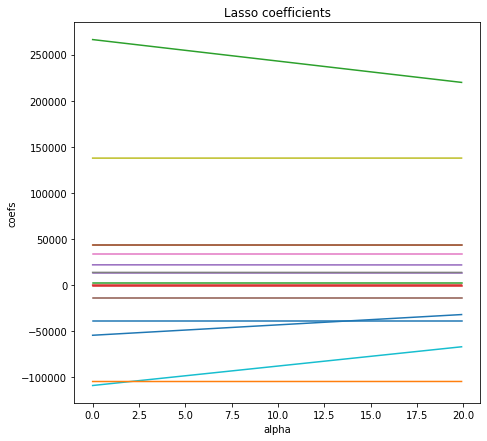

In [62]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# Elastic Net Regression


In [63]:
# Import relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

46460610391.346344


In [66]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([ -35863.79086916,   39870.69676216,   75044.43677341,
           -333.12477262,   13010.95563547,   50279.28499682,
          33095.37670989,   13397.18914159,  141417.42786806,
          63608.57659742,   36718.78306492, -104757.71133958,
           3944.59227064,    -647.28092032,   17779.60761814,
         -14912.07053236])}

In [65]:
# Creating features and target matrixes
#
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]
y = house[['price']]

In [76]:
# Training the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# MSE for trained dataset
mean_squared_error(y_test, linear.predict(X_test))

50869105535.37886

In [78]:
# Getting the coefficients
coef_dict_baseline_linear= {}
for coef, feat in zip(linear.coef_,X_test.columns):
    coef_dict_baseline_linear[feat] = coef
coef_dict_baseline_linear

{'bedrooms': array([-4.30711560e+04,  5.77356605e+04,  1.06723528e+02, -1.23790437e-02,
         2.29301234e+04,  5.13597311e+05,  4.29932837e+04,  2.12566390e+04,
         1.17098920e+05,  4.94363812e+01,  5.72871472e+01, -3.53759009e+03,
         6.43803368e+00, -3.22051924e-01,  3.37147395e+01, -5.24949010e-01])}

In [65]:
# Using the Elastic model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [79]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X_test,y_test)
search.best_params_


{'alpha': 0.01}

In [83]:
search.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [80]:
abs(search.best_score_)

50629056391.33189

In [81]:
# Fitting the model and getting MSE for trained dataset
elastic=ElasticNet(normalize=True,alpha=0.01,l1_ratio=0.8)
elastic.fit(X_test,y_test)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

91475190535.40256


The MSE for the Elasticity Net regression is way bigger than that of the Linear regression model meaning that the Elasticity Net regression performs poorly comparatively.

In [82]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 19394.40869061722,
 'bedrooms': 7484.444477759213,
 'condition': 3233.845191032058,
 'floors': 10469.269341028965,
 'grade': 17129.51799580636,
 'sqft_above': 21.05714696113647,
 'sqft_basement': 24.344117880554627,
 'sqft_living': 22.166795651517376,
 'sqft_living15': 23.976983896790777,
 'sqft_lot': 0.07987445094519811,
 'sqft_lot15': 0.07609542647895638,
 'view': 16905.08948223049,
 'waterfront': 136455.27781735425,
 'yr_built': -58.86601934792729,
 'yr_renovated': 12.069087441570451,
 'zipcode': -5.840496744291112}

# Conclusion

The different methods performed differently at predicting the prices. The best models were multiple regression model and the ridge regression model which both achieved an accuracy of 66%.